In [1]:
import pandas as pd
import os
import numpy as np
# Specify the directory where your CSV files are stored
csv_directory = '/Downloads/UNPROCESSED_combined_When2heat_bolnabohotkuch'

# List all CSV files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# Create an empty dictionary to store country-wise DataFrames
country_dfs = {}

# Iterate through CSV files and create DataFrames
for csv_file in csv_files:
    # Extract the country code from the filename (adjust this based on your file naming convention)
    country_code = csv_file.split('_')[0]  # Assuming the country code is at the beginning of the filename

    # Read the CSV file into a DataFrame
    file_path = os.path.join(csv_directory, csv_file)
    country_df = pd.read_csv(file_path)

    # Add the DataFrame to the dictionary
    country_dfs[country_code] = country_df


In [2]:
country_df.head()

,cet_cest_timestamp,year,month,day,hour,COP_ASHP_floor,COP_ASHP_radiator,COP_ASHP_water,COP_GSHP_floor,COP_GSHP_radiator,...,heat_demand_water,heat_demand_water_COM,heat_demand_water_MFH,heat_demand_water_SFH,heat_profile_space_COM,heat_profile_space_MFH,heat_profile_space_SFH,heat_profile_water_COM,heat_profile_water_MFH,heat_profile_water_SFH
0,2008-01-01T03:30:00.000+05:30,2008,1,1,3,3.0,2.833333,2.0,4.0,NaN,...,45.0,16.0,20.0,9.0,176.0,128.0,143.0,66.0,68.0,12.0
1,2008-01-01T04:30:00.000+05:30,2008,1,1,4,3.0,2.833333,2.0,4.0,NaN,...,52.0,20.0,21.0,10.0,179.0,132.0,145.0,83.0,71.0,15.0
2,2008-01-01T05:30:00.000+05:30,2008,1,1,5,3.0,2.833333,2.0,4.0,NaN,...,50.0,21.0,20.0,9.0,183.0,135.0,150.0,86.0,68.0,12.0
3,2008-01-01T06:30:00.000+05:30,2008,1,1,6,3.0,2.833333,2.0,4.0,NaN,...,57.0,22.0,20.0,16.0,196.0,148.0,157.0,88.0,66.0,22.0
4,2008-01-01T07:30:00.000+05:30,2008,1,1,7,3.0,2.833333,2.0,4.0,NaN,...,98.0,30.0,31.0,37.0,197.0,173.0,177.0,121.0,105.0,53.0


In [3]:
generic_column_names = ['COP_ASHP_floor', 'COP_ASHP_radiator', 'COP_ASHP_water',
                        'COP_GSHP_floor', 'COP_GSHP_radiator', 'COP_GSHP_water',
                        'COP_WSHP_floor', 'COP_WSHP_radiator', 'COP_WSHP_water',
                        'heat_demand_space', 'heat_demand_space_COM', 'heat_demand_space_MFH',
                        'heat_demand_space_SFH', 'heat_demand_total', 'heat_demand_water',
                        'heat_demand_water_COM', 'heat_demand_water_MFH', 'heat_demand_water_SFH',
                        'heat_profile_space_COM', 'heat_profile_space_MFH', 'heat_profile_space_SFH',
                        'heat_profile_water_COM', 'heat_profile_water_MFH', 'heat_profile_water_SFH']

country_codes = ['SE', 'EE', 'NO', 'DK', 'GR', 'IE', 'SK', 'PT', 'BE', 'SI', 'LU', 'IT', 'NL', 'HR', 'ES', 'CZ', 'AT', 'DE', 'HU', 'RO', 'LT', 'FR', 'BG', 'CH', 'FI', 'GB', 'LV', 'PL']

In [4]:
# Iterate through country DataFrames
for country_code, country_df in country_dfs.items():
    # Skip DataFrames with no 'heat_demand' columns
    if not any('heat_demand' in col for col in country_df.columns):
        print(f"Skipping {country_code} DataFrame as it has no 'heat_demand' columns.")
        continue

    print(f"Processing {country_code} DataFrame...")

    # Get the timestamp range for the current country DataFrame
    from_timestamp = "2016-02-01T00:30:00.000+05:30"
    till_timestamp = "2023-01-01T04:30:00.000+05:30"

    # Filter rows within the specified timestamp range
    selected_rows = country_df[(country_df['cet_cest_timestamp'] >= from_timestamp) & (country_df['cet_cest_timestamp'] <= till_timestamp)]

    # Identify rows with null or 0.0 values in the specified columns
    columns_to_check = ['heat_demand_space', 'heat_demand_space_COM', 'heat_demand_space_MFH',
                        'heat_demand_space_SFH', 'heat_demand_total', 'heat_demand_water',
                        'heat_demand_water_COM', 'heat_demand_water_MFH', 'heat_demand_water_SFH']

    rows_to_remove = selected_rows[selected_rows[columns_to_check].isnull().any(axis=1) | selected_rows[columns_to_check].eq(0.0).any(axis=1) | selected_rows[columns_to_check].eq('').any(axis=1)]

    # Remove identified rows from the country DataFrame
    country_df = country_df.drop(rows_to_remove.index)

    print(f"Finished processing {country_code} DataFrame.\n")

    # Update the country DataFrame in the dictionary
    country_dfs[country_code] = country_df


Processing HR DataFrame...
Finished processing HR DataFrame.

Processing DE DataFrame...
Finished processing DE DataFrame.

Skipping CH DataFrame as it has no 'heat_demand' columns.
Processing GB DataFrame...
Finished processing GB DataFrame.

Processing BG DataFrame...
Finished processing BG DataFrame.

Processing DK DataFrame...
Finished processing DK DataFrame.

Processing FR DataFrame...
Finished processing FR DataFrame.

Processing BE DataFrame...
Finished processing BE DataFrame.

Processing ES DataFrame...
Finished processing ES DataFrame.

Skipping NO DataFrame as it has no 'heat_demand' columns.
Processing FI DataFrame...
Finished processing FI DataFrame.

Processing LV DataFrame...
Finished processing LV DataFrame.

Processing RO DataFrame...
Finished processing RO DataFrame.

Processing PT DataFrame...
Finished processing PT DataFrame.

Processing LT DataFrame...
Finished processing LT DataFrame.

Processing CZ DataFrame...
Finished processing CZ DataFrame.

Processing PL Da

In [6]:
# Iterate through country DataFrames
for country_code, country_df in country_dfs.items():
    # Skip DataFrames with no 'heat_demand' columns
    if not any('heat_demand' in col for col in country_df.columns):
        print(f"Skipping {country_code} DataFrame as it has no 'heat_demand' columns.")
        continue

    print(f"Processing {country_code} DataFrame...")

    # Identify columns to check for NaN values
    columns_to_check = ['COP_ASHP_floor', 'COP_ASHP_radiator', 'COP_ASHP_water',
                        'COP_GSHP_floor', 'COP_GSHP_radiator', 'COP_GSHP_water',
                        'COP_WSHP_floor', 'COP_WSHP_radiator', 'COP_WSHP_water',
                        'heat_demand_space', 'heat_demand_space_COM', 'heat_demand_space_MFH',
                        'heat_demand_space_SFH', 'heat_demand_total', 'heat_demand_water',
                        'heat_demand_water_COM', 'heat_demand_water_MFH', 'heat_demand_water_SFH',
                        'heat_profile_space_COM', 'heat_profile_space_MFH', 'heat_profile_space_SFH',
                        'heat_profile_water_COM', 'heat_profile_water_MFH', 'heat_profile_water_SFH']

    # Replace NaN values with the mean of each column
    country_df[columns_to_check] = country_df[columns_to_check].apply(lambda col: col.fillna(col.mean()))

    print(f"Finished processing {country_code} DataFrame.\n")

    # Update the country DataFrame in the dictionary
    country_dfs[country_code] = country_df


Processing HR DataFrame...
Finished processing HR DataFrame.

Processing DE DataFrame...
Finished processing DE DataFrame.

Skipping CH DataFrame as it has no 'heat_demand' columns.
Processing GB DataFrame...
Finished processing GB DataFrame.

Processing BG DataFrame...
Finished processing BG DataFrame.

Processing DK DataFrame...
Finished processing DK DataFrame.

Processing FR DataFrame...
Finished processing FR DataFrame.

Processing BE DataFrame...
Finished processing BE DataFrame.

Processing ES DataFrame...
Finished processing ES DataFrame.

Skipping NO DataFrame as it has no 'heat_demand' columns.
Processing FI DataFrame...
Finished processing FI DataFrame.

Processing LV DataFrame...
Finished processing LV DataFrame.

Processing RO DataFrame...
Finished processing RO DataFrame.

Processing PT DataFrame...
Finished processing PT DataFrame.

Processing LT DataFrame...
Finished processing LT DataFrame.

Processing CZ DataFrame...
Finished processing CZ DataFrame.

Processing PL Da

In [8]:
# Drop 'COP_WSHP_water' from all DataFrames
for country_code, country_df in country_dfs.items():
    if 'COP_WSHP_water' in country_df.columns:
        country_df.drop('COP_WSHP_water', axis=1, inplace=True)





In [16]:
import pandas as pd

# Assuming 'country_dfs' is the dictionary containing DataFrames for different countries

# Define country codes for CH and NO
ch_country_code = 'CH'
no_country_code = 'NO'

# Define the NaN threshold
nan_threshold = 1

# Iterate through country DataFrames
for country_code, country_df in country_dfs.items():
    # Check for CH DataFrame
    if country_code == ch_country_code:
        # Drop columns with NaN values exceeding the threshold
        columns_to_drop = country_df.columns[country_df.isnull().sum() > nan_threshold]
        country_df.drop(columns_to_drop, axis=1, inplace=True)

        # Replace remaining NaN values in CH DataFrame with column means
        country_df.fillna(country_df.mean(), inplace=True)

    # Check for NO DataFrame
    elif country_code == no_country_code:
        # Drop columns with NaN values exceeding the threshold
        columns_to_drop = country_df.columns[country_df.isnull().sum() > nan_threshold]
        country_df.drop(columns_to_drop, axis=1, inplace=True)

        # Replace remaining NaN values in NO DataFrame with column means
        country_df.fillna(country_df.mean(), inplace=True)

# Update the country DataFrames in the dictionary
country_dfs[ch_country_code] = ch_df
country_dfs[no_country_code] = no_df


In [17]:
# Iterate through country DataFrames
for country_code, country_df in country_dfs.items():
    print(f"Checking NaN values in {country_code} DataFrame...")

    # Check for NaN values in each column
    nan_values = country_df.isnull().sum()

    # Print the result
    print(f"NaN values in {country_code} DataFrame:")
    print(nan_values)

    print(f"Finished checking NaN values for {country_code} DataFrame.\n")


Checking NaN values in HR DataFrame...
NaN values in HR DataFrame:
cet_cest_timestamp        0
year                      0
month                     0
day                       0
hour                      0
COP_ASHP_floor            0
COP_ASHP_radiator         0
COP_ASHP_water            0
COP_GSHP_floor            0
COP_GSHP_radiator         0
COP_GSHP_water            0
COP_WSHP_floor            0
COP_WSHP_radiator         0
heat_demand_space         0
heat_demand_space_COM     0
heat_demand_space_MFH     0
heat_demand_space_SFH     0
heat_demand_total         0
heat_demand_water         0
heat_demand_water_COM     0
heat_demand_water_MFH     0
heat_demand_water_SFH     0
heat_profile_space_COM    0
heat_profile_space_MFH    0
heat_profile_space_SFH    0
heat_profile_water_COM    0
heat_profile_water_MFH    0
heat_profile_water_SFH    0
dtype: int64
Finished checking NaN values for HR DataFrame.

Checking NaN values in DE DataFrame...
NaN values in DE DataFrame:
cet_cest_timestamp   

In [21]:
import pandas as pd

# Assuming 'country_dfs' is the dictionary containing DataFrames for different countries

# Define country code for NO
no_country_code = 'NO'

# Columns to drop for NO DataFrame
columns_to_drop_no = [
    'COP_ASHP_floor',
    'COP_ASHP_radiator',
    'COP_ASHP_water',
    'COP_GSHP_floor',
    'COP_GSHP_radiator',
    'COP_GSHP_water',
    'COP_WSHP_floor',
    'COP_WSHP_radiator'
]

# Check for NO DataFrame
if no_country_code in country_dfs:
    # Drop specified columns
    no_df = country_dfs[no_country_code]
    no_df.drop(columns=columns_to_drop_no, inplace=True)

    # Update the country DataFrame in the dictionary
    country_dfs[no_country_code] = no_df
else:
    print(f"No DataFrame found for {no_country_code}. Skipping...")


In [22]:
# Iterate through country DataFrames
for country_code, country_df in country_dfs.items():
    print(f"Checking NaN values in {country_code} DataFrame...")

    # Check for NaN values in each column
    nan_values = country_df.isnull().sum()

    # Print the result
    print(f"NaN values in {country_code} DataFrame:")
    print(nan_values)

    print(f"Finished checking NaN values for {country_code} DataFrame.\n")


Checking NaN values in HR DataFrame...
NaN values in HR DataFrame:
cet_cest_timestamp        0
year                      0
month                     0
day                       0
hour                      0
COP_ASHP_floor            0
COP_ASHP_radiator         0
COP_ASHP_water            0
COP_GSHP_floor            0
COP_GSHP_radiator         0
COP_GSHP_water            0
COP_WSHP_floor            0
COP_WSHP_radiator         0
heat_demand_space         0
heat_demand_space_COM     0
heat_demand_space_MFH     0
heat_demand_space_SFH     0
heat_demand_total         0
heat_demand_water         0
heat_demand_water_COM     0
heat_demand_water_MFH     0
heat_demand_water_SFH     0
heat_profile_space_COM    0
heat_profile_space_MFH    0
heat_profile_space_SFH    0
heat_profile_water_COM    0
heat_profile_water_MFH    0
heat_profile_water_SFH    0
dtype: int64
Finished checking NaN values for HR DataFrame.

Checking NaN values in DE DataFrame...
NaN values in DE DataFrame:
cet_cest_timestamp   

NaN values in LU DataFrame:
cet_cest_timestamp        0
year                      0
month                     0
day                       0
hour                      0
COP_ASHP_floor            0
COP_ASHP_radiator         0
COP_ASHP_water            0
COP_GSHP_floor            0
COP_GSHP_radiator         0
COP_GSHP_water            0
COP_WSHP_floor            0
COP_WSHP_radiator         0
heat_demand_space         0
heat_demand_space_COM     0
heat_demand_space_MFH     0
heat_demand_space_SFH     0
heat_demand_total         0
heat_demand_water         0
heat_demand_water_COM     0
heat_demand_water_MFH     0
heat_demand_water_SFH     0
heat_profile_space_COM    0
heat_profile_space_MFH    0
heat_profile_space_SFH    0
heat_profile_water_COM    0
heat_profile_water_MFH    0
heat_profile_water_SFH    0
dtype: int64
Finished checking NaN values for LU DataFrame.

Checking NaN values in AT DataFrame...
NaN values in AT DataFrame:
cet_cest_timestamp        0
year                      0
mont

In [23]:
import os
import pandas as pd

output_folder = "/Downloads/godsplan1"

for country, df in country_dfs.items():
    # Save Pandas DataFrame to CSV in the specified folder
    csv_file_path = os.path.join(output_folder, f"{country}_preprocessed_data.csv")
    df.to_csv(csv_file_path, index=False)


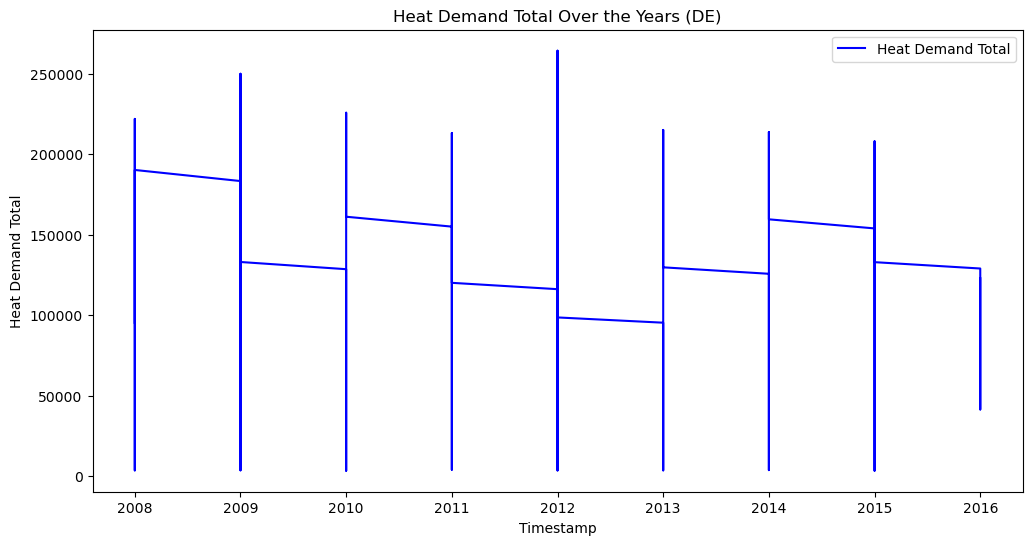

In [25]:
import matplotlib.pyplot as plt

# Assuming 'country_dfs' is the dictionary containing DataFrames for different countries
# and 'DE' is the country code for Germany

# Check if DE DataFrame exists
if 'DE' in country_dfs:
    # Extract DE DataFrame
    de_df = country_dfs['DE']

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(de_df['year'], de_df['heat_demand_total'], label='Heat Demand Total', color='blue')
    plt.title('Heat Demand Total Over the Years (DE)')
    plt.xlabel('Timestamp')
    plt.ylabel('Heat Demand Total')
    plt.legend()
    plt.show()
else:
    print("No DataFrame found for DE. Please make sure it exists in the 'country_dfs' dictionary.")
